The goal of my project is to determine if the sentiment of a statment is postive, neutral or negative. I am using a data set called Tweets.csv from https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset. The data set contains 27.5k tweets with sentiment annalysis. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re 
# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tweetscsv/Tweets.csv


In [2]:
data_URL = '/kaggle/input/tweetscsv/Tweets.csv'
df = pd.read_csv(data_URL)
df.shape

(27481, 4)

In [3]:
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [6]:
df.tail()

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


neutral     40.454876
positive    31.229985
negative    28.315138
Name: sentiment, dtype: float64


([<matplotlib.patches.Wedge at 0x7f732ef44c50>,
 [Text(-1.0509127456270435, 0.3249344565887541, 'Negative'),
  Text(0.4094229682749853, -1.0209666170100278, 'Positive'),
  Text(0.8544647281492502, 0.6927409532782282, 'Neutral')],
 [Text(-0.5732251339783874, 0.17723697632113858, '40.5%'),
  Text(0.22332161905908288, -0.5568908820054695, '31.2%'),
  Text(0.4660716698995909, 0.3778587017881244, '28.3%')])

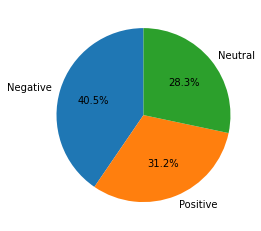

In [7]:
f=df['sentiment'].value_counts()
print((f*100)/f.sum())
plt.pie(f,labels=['Negative','Positive','Neutral'],autopct='%1.1f%%',startangle=90)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

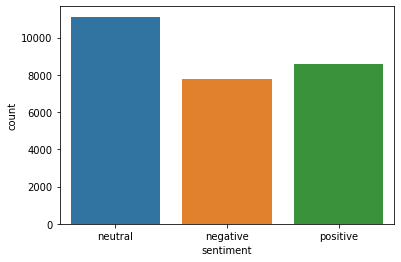

In [8]:
import seaborn as sns 
sns.countplot(x=df['sentiment'])

In [9]:
df.duplicated().sum()

0